# DataJoint U24 - Workflow Miniscope

## Workflow structure

### Setup

This notebook gives a brief overview of the workflow structure and introduces some useful DataJoint tools to facilitate the exploration.

+ DataJoint needs to be configured before running this notebook, see [01-configure](01-configure.ipynb).

+ If you are familiar with DataJoint and the workflow structure, proceed to [03-process](03-process.ipynb).

+ For a more thorough introduction of DataJoint, please visit our [general tutorial site](https://playground.datajoint.io)

To load the local config, we will change the directory to the package root.

In [1]:
import os
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='workflow-miniscope', (
    "Please move to the workflow directory")
import datajoint as dj

### Schemas and tables

In [ ]:
import datajoint as dj
from workflow_miniscope.pipeline import lab, subject, session, miniscope

Each module contains a schema object that enables interaction with the schema in the database.

In [3]:
miniscope.schema

Schema `neuro_imaging`

+ The table classes in the module corresponds to a table in the schema in the database.

In [4]:
# preview columns and contents in a table
miniscope.Activity()

*subject    *session_datet *scan_id    *paramset_idx  processing_tim package_versio
+---------+ +------------+ +---------+ +------------+ +------------+ +------------+

 (Total: 0)

+ By importing the modules for the first time, the schemas and tables will be created inside the database.

+ Once created, importing modules will not create schemas and tables again, but the existing schemas/tables can be accessed and manipulated by the modules.

### Tools to explore

+ `dj.list_schemas()`: list all schemas a user has access to in the current database

In [19]:
dj.list_schemas()

+ `dj.Diagram()`: plot tables and dependencies in a schema. 

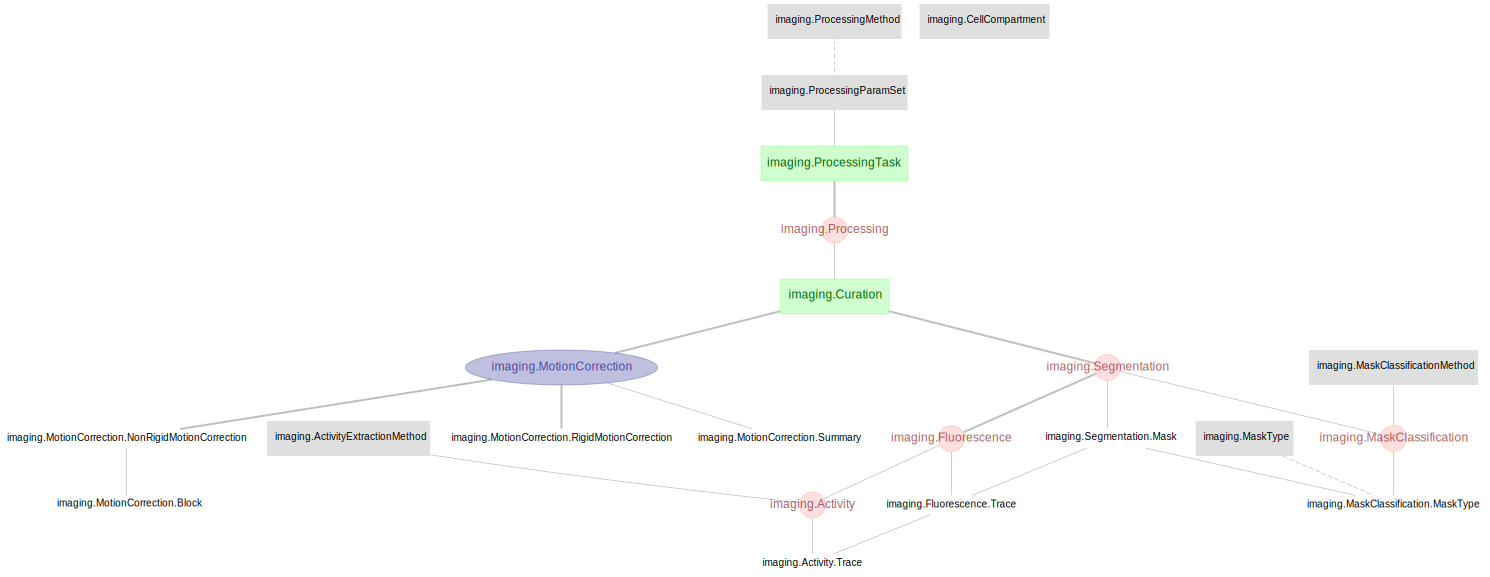

In [6]:
# plot diagram for all tables in a schema
dj.Diagram(miniscope)

**Table tiers**: 

- Manual table: green box, manually inserted table, expect new entries daily (e.g. `Recording`, `Recording`).  
- Lookup table: gray box, pre-inserted table, commonly used for general facts or parameters (e.g., `ActivityExtractionMethod`).  
- Imported table: blue oval, auto-processing table, the processing depends on the importing of external files (e.g., `MotionCorrection` depends on CaImAn files).  
- Computed table: red circle, auto-processing table, the processing does not depend on files external to the database, commonly used for using scripts within the dataframe to process data. - Part table: plain text, as an appendix to the master table, all the part entries of a given master entry represent a intact set of the master entry (e.g., an activity trace under `Activity`).

**Dependencies**:  

- One-to-one primary: thick solid line, share the exact same primary key, meaning the child table inherits all the primary key fields from the parent table as its own primary key.     
- One-to-many primary: thin solid line, inherit the primary key from the parent table, but have additional field(s) as part of the primary key as well
- Secondary dependency: dashed line, the child table inherits the primary key fields from parent table as its own secondary attribute.

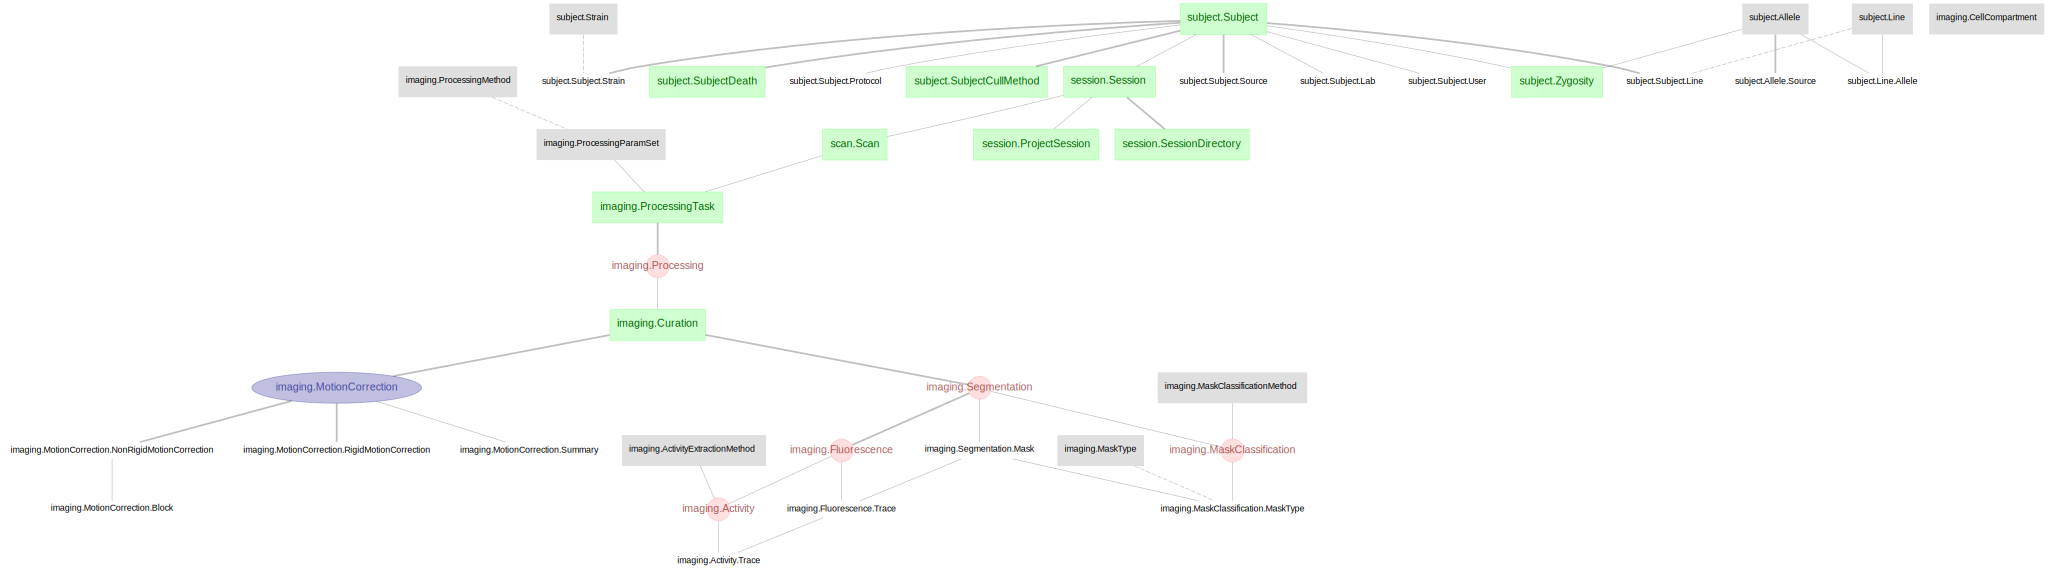

In [7]:
# plot diagram of tables in multiple schemas
dj.Diagram(subject) + dj.Diagram(session) + dj.Diagram(miniscope)

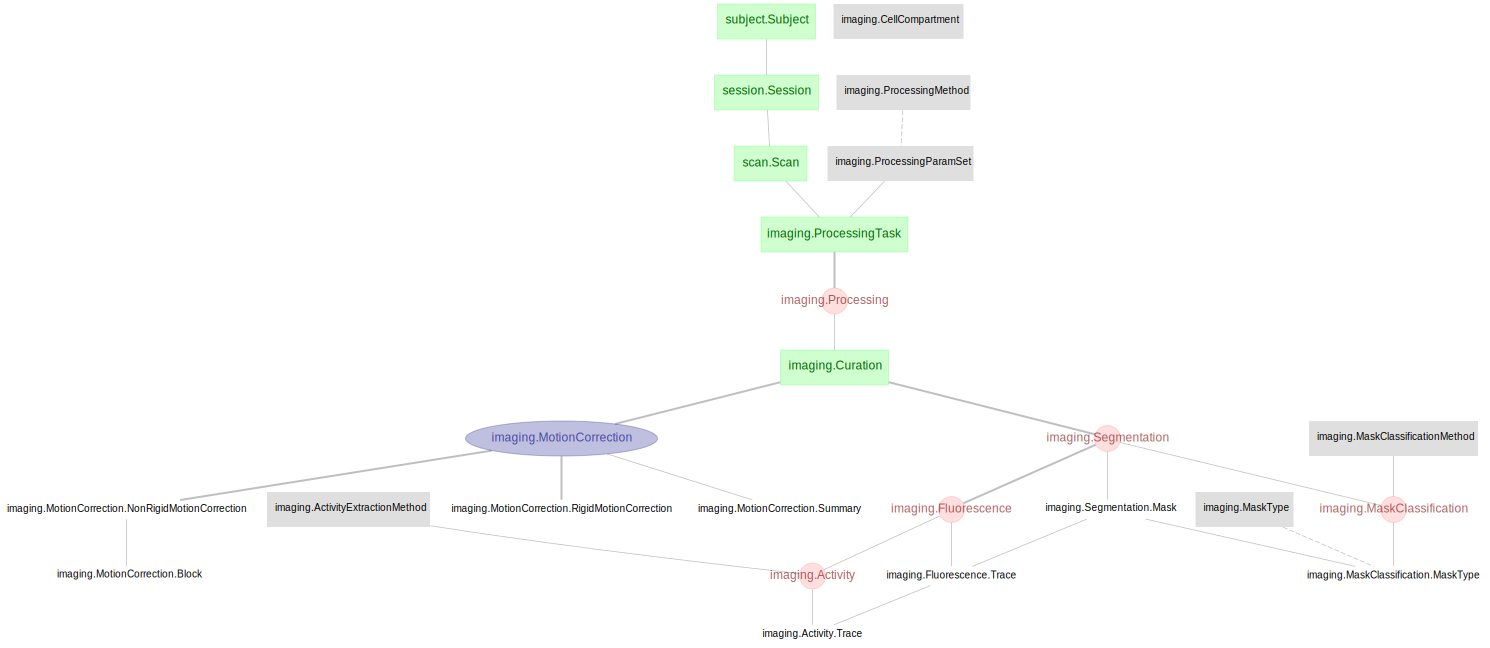

In [8]:
# plot diagram of selected tables and schemas
dj.Diagram(subject.Subject) + dj.Diagram(session.Session) + dj.Diagram(miniscope)

+ `describe()`: show table definition with foreign key references.

In [9]:
miniscope.Activity.describe();

# Processing Procedure
-> imaging.ProcessingTask
---
processing_time      : datetime                     # time of generation of this set of processed, segmented results
package_version=""   : varchar(16)                  



+ `heading`: show attribute definitions regardless of foreign key references

In [10]:
miniscope.Activity.heading

# Processing Procedure
subject              : varchar(32)                  # 
session_datetime     : datetime(3)                  # 
scan_id              : int                          # 
paramset_idx         : smallint                     # 
---
processing_time      : datetime                     # time of generation of this set of processed, segmented results
package_version=""   : varchar(16)                  # 

### Supporting Elements

+ [Lab](https://github.com/datajoint/element-lab): lab management related information, such as Lab, User, Project, Protocol, Source.

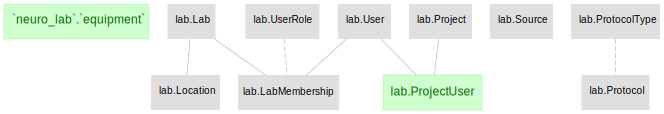

In [11]:
dj.Diagram(lab)

+ [Subject](https://github.com/datajoint/element-animal): general animal information, User, Genetic background, Death etc.

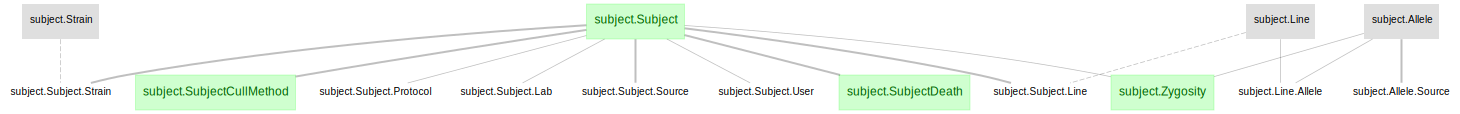

In [12]:
dj.Diagram(subject)

In [13]:
subject.Subject.describe();

# Animal Subject
subject              : varchar(32)                  
---
sex                  : enum('M','F','U')            
subject_birth_date   : date                         
subject_description="" : varchar(1024)                



+ [Session](https://github.com/datajoint/element-session): General information of experimental sessions.

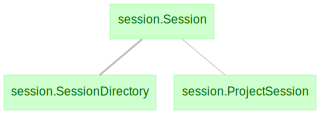

In [14]:
dj.Diagram(session)

In [15]:
session.Session.describe();

-> subject.Subject
session_datetime     : datetime(3)                  



+ [Miniscope](https://github.com/datajoint/element-miniscope): Raw scan and processed data

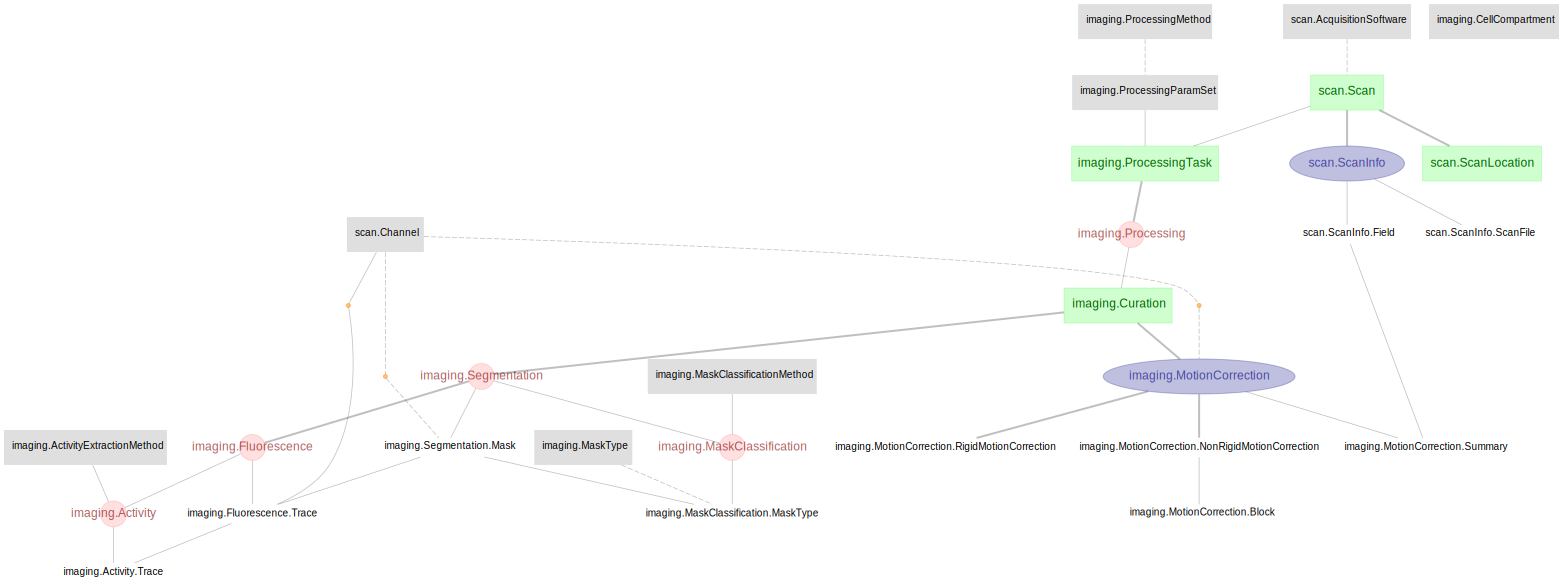

In [16]:
dj.Diagram(miniscope)

## Summary and next step

This notebook introduced the overall structures of the schemas and tables in the workflow and relevant tools to explore the schema structure and table definitions.

In the next notebook [03-process](03-process.ipynb), we will introduce the detailed steps to run through `workflow-miniscope`.